<a href="https://colab.research.google.com/github/karan2599/FIFA-19-Regression/blob/main/FIFA_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
FIFA_ds = pd.read_csv('/content/gdrive/MyDrive/Datasets/FIFA.csv')

# 2.1 

###a) Brief Exploration




In [ ]:
print('Number of rows & columns: ', FIFA_ds.shape)

Number of rows & columns:  (18207, 89)


In [ ]:
FIFA_ds.drop_duplicates()
print("Number of rows & columns after dropping duplicates: ", FIFA_ds.shape)

Number of rows & columns after dropping duplicates:  (18207, 89)


Hence confirmed that there are no duplicate values

In [ ]:
print('No. of Categorical Features: ', len(FIFA_ds.select_dtypes(include=object).columns))
print('No. of Numerical Features: ', len(FIFA_ds.select_dtypes(exclude=object).columns))

No. of Categorical Features:  45
No. of Numerical Features:  44


In [ ]:
FIFA_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

Above are the data types of all the features

In [ ]:
FIFA_ds.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffba1c1a590>,
      dtype=object)

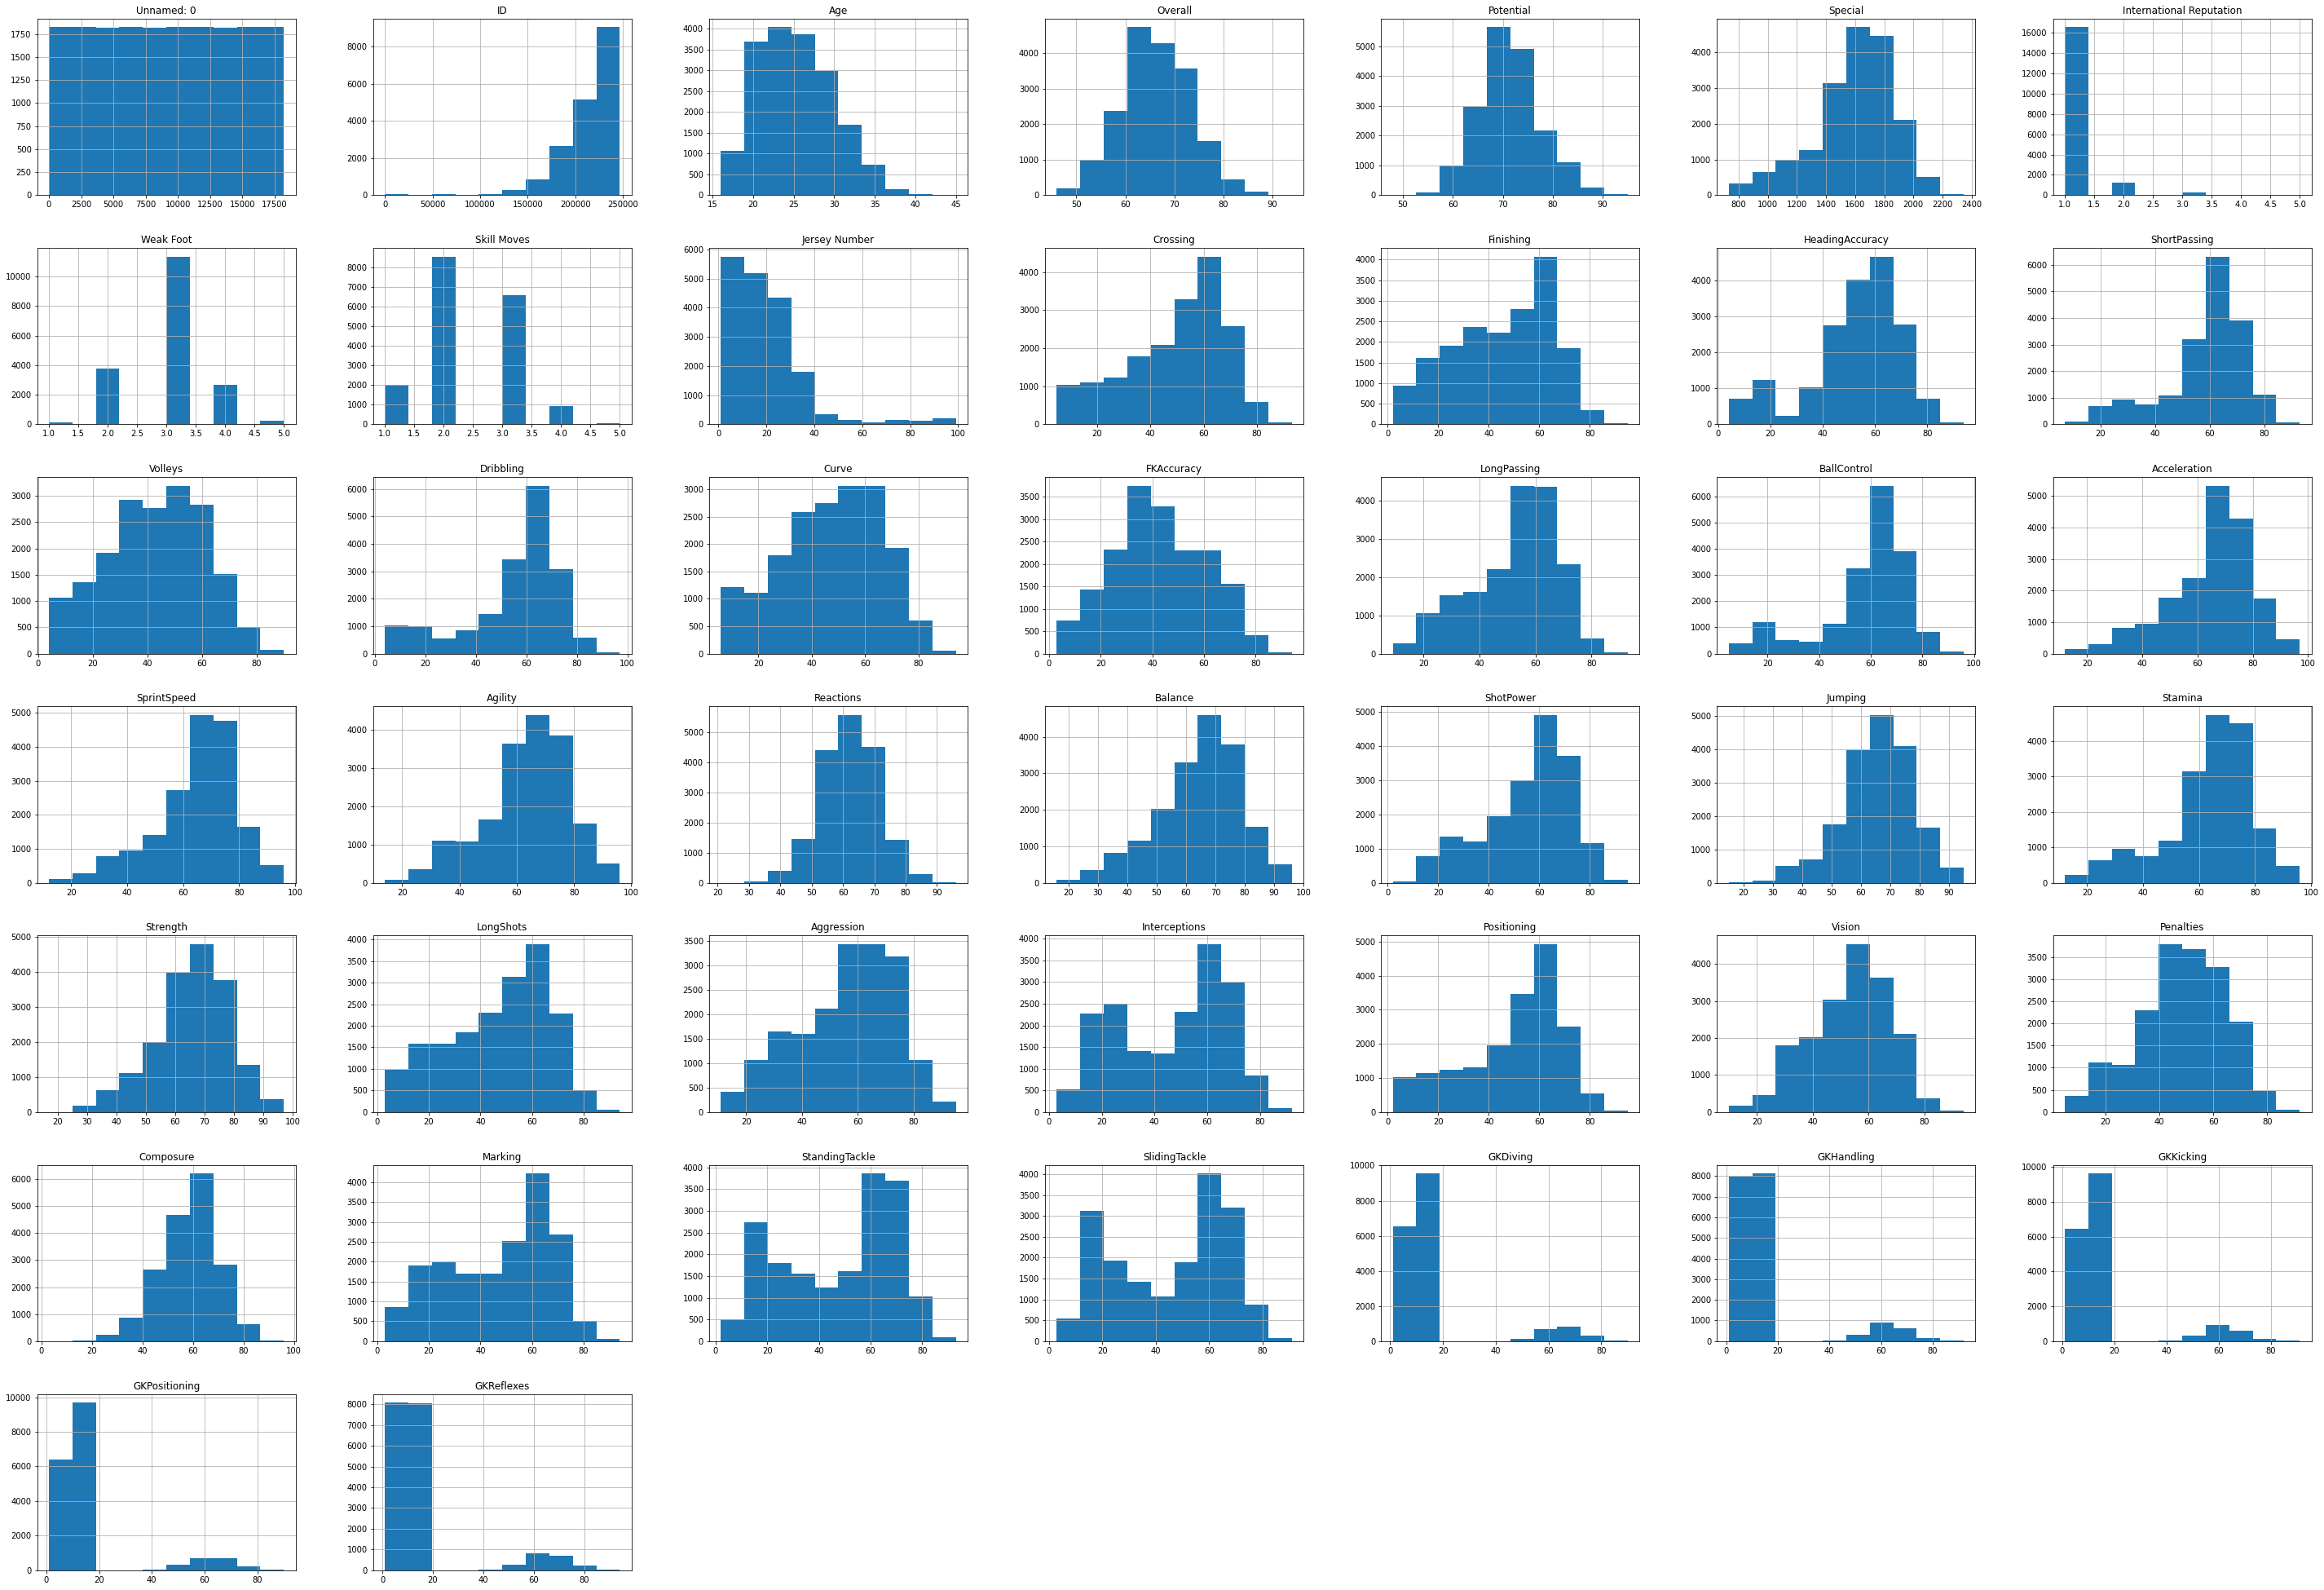

In [ ]:
FIFA_ds.hist(figsize=(50,35))

Above are the histograms of our features.

###b) Preprocessing



In [ ]:
FIFA_ds.isnull().values.any()

True

Hence, confirmed that our dataset does have missing values

In [ ]:
FIFA_ds.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [ ]:
FIFA_ds.isnull().sum().sum()

76984

As we can, there are 76984 missing values which are a lot. We will now focus on replacing/dropping these missing values

###c) Feature Extraction



In [ ]:
valid_columns = ['Age','Overall', 'Potential', 'Wage','International Reputation','Weak Foot','Skill Moves','Height','Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 
'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'Value','Release Clause']

I chose the above features that I will be using for my regression models. I mainly chose these features due to their numeric attributes

In [ ]:
FIFA_ds[valid_columns]

,Age,Overall,Potential,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Value,Release Clause
0,31,94,94,€565K,5.0,4.0,4.0,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,€110.5M,€226.5M
1,33,94,94,€405K,5.0,4.0,5.0,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,€77M,€127.1M
2,26,92,93,€290K,5.0,5.0,5.0,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,€118.5M,€228.1M
3,27,91,93,€260K,4.0,3.0,1.0,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,€72M,€138.6M
4,27,91,92,€355K,4.0,5.0,4.0,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,€102M,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,€1K,1.0,2.0,2.0,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,€60K,€143K
18203,19,47,63,€1K,1.0,2.0,2.0,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,€60K,€113K
18204,16,47,67,€1K,1.0,3.0,2.0,5'8,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,€60K,€165K
18205,17,47,66,€1K,1.0,3.0,2.0,5'10,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,€60K,€143K


Above is the reduced dataset that I will be using for my models

In [ ]:
FIFA_ds = FIFA_ds[valid_columns]
FIFA_ds.dropna(inplace=True)

Replacing the orignal dataset with the new reduced dataset

In [ ]:
FIFA_ds.isnull().sum().sum()

0

As we can see, we have handled all the missing values

Since Height has " **'** " and Weight has "**lbs**", these are not numerical attributes but rather string attributes. To convert them, I created the following 2 functions.

In [ ]:
def height_conversion(value):

    a = value.split("'")[0]
    b = value.split("'")[1]
    result = (int(a)*12) + (int(b)*1)
    return result

def weight_conversion(value):

    weight = int(value.split('lbs')[0])
    return weight


In [ ]:
FIFA_ds['Height (inches)'] = FIFA_ds['Height'].apply(height_conversion)
FIFA_ds['Weight (lbs)'] = FIFA_ds['Weight'].apply(weight_conversion)

FIFA_ds.drop(columns=['Height', 'Weight'], inplace=True)


With the above functions, we successfully covert the data type from string to numerical and replace the orignal **Height** and **Weight** columns with our new columns

In [ ]:
def money_conversion(value):
    if value[-1] == 'K':
        value = value[1:-1]
        value = float(value)*1000
        return value
        
    elif value[-1] == 'M':
        value = value[1:-1]
        value = float(value)*1000000
        return value
    
    else:
        return 0

In [ ]:
FIFA_ds['Numeric Wage'] = FIFA_ds['Wage'].apply(money_conversion)
FIFA_ds['Numeric Value'] = FIFA_ds['Value'].apply(money_conversion)
FIFA_ds['Numeric Release Clause'] = FIFA_ds['Release Clause'].apply(money_conversion)
FIFA_ds.drop(columns=['Value', 'Wage', 'Release Clause'], inplace=True)



Similar to the Height and Weight columns, we have converted the columns - Wage, Value and Release Clause from string to number by removing the currency symbol and expanding the "**K**" and "**M**" values by creating a similar function

In [ ]:
FIFA_ds

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Height (inches),Weight (lbs),Numeric Wage,Numeric Value,Numeric Release Clause
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,67,159,565000.0,110500000.0,226500000.0
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,74,183,405000.0,77000000.0,127100000.0
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,69,150,290000.0,118500000.0,228100000.0
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,76,168,260000.0,72000000.0,138600000.0
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,71,154,355000.0,102000000.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1.0,2.0,2.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,69,134,1000.0,60000.0,143000.0
18203,19,47,63,1.0,2.0,2.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,75,170,1000.0,60000.0,113000.0
18204,16,47,67,1.0,3.0,2.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,68,148,1000.0,60000.0,165000.0
18205,17,47,66,1.0,3.0,2.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,70,154,1000.0,60000.0,143000.0


With this, all our features have been converted into a numerical format.

In [ ]:
corr_matrix=FIFA_ds.corr()
corr_matrix

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Height (inches),Weight (lbs),Numeric Wage,Numeric Value,Numeric Release Clause
Age,1.000000,0.464977,-0.236762,0.250947,0.065577,0.036189,0.137798,0.077465,0.153163,0.141588,0.150618,0.018858,0.152318,0.202242,0.187692,0.095874,-0.152913,-0.145548,-0.012920,0.462434,-0.087217,0.165092,0.179978,0.103525,0.340691,0.164493,0.269639,0.200477,0.091769,0.199103,0.147641,0.402007,0.145740,0.121925,0.104952,0.085158,0.232396,0.148525,0.076475,0.060760
Overall,0.464977,1.000000,0.663346,0.503630,0.210808,0.415560,0.398492,0.334448,0.345059,0.505268,0.391214,0.374334,0.420926,0.399858,0.489228,0.463372,0.199305,0.214794,0.267600,0.853842,0.105932,0.442986,0.268187,0.370981,0.357173,0.422167,0.403751,0.331361,0.358573,0.504292,0.343873,0.732752,0.294234,0.261570,0.231717,0.038439,0.154207,0.573896,0.629198,0.616422
Potential,-0.236762,0.663346,1.000000,0.386085,0.157624,0.352585,0.247693,0.241756,0.203994,0.370710,0.253330,0.313638,0.278592,0.230568,0.327245,0.353529,0.235132,0.238926,0.223028,0.520090,0.140546,0.287914,0.114709,0.206223,0.079672,0.264707,0.179300,0.165053,0.244583,0.350059,0.223848,0.444690,0.169212,0.151542,0.137164,-0.012609,-0.008595,0.490633,0.585352,0.586751
International Reputation,0.250947,0.503630,0.386085,1.000000,0.126812,0.209651,0.193627,0.179614,0.158696,0.245921,0.242843,0.180835,0.234600,0.225822,0.242276,0.220597,0.047495,0.047942,0.102356,0.450000,0.052525,0.227668,0.121405,0.096302,0.130376,0.214340,0.173240,0.132127,0.183849,0.287385,0.219858,0.395953,0.118136,0.095872,0.082258,0.034526,0.086367,0.677923,0.657724,0.641156
Weak Foot,0.065577,0.210808,0.157624,0.126812,1.000000,0.337303,0.309577,0.356841,0.184957,0.322173,0.355597,0.351917,0.344953,0.331106,0.279955,0.356028,0.259517,0.248468,0.300683,0.201231,0.255033,0.332158,0.074735,0.235869,-0.004932,0.355656,0.137136,0.061701,0.346512,0.337864,0.330332,0.277838,0.073399,0.050211,0.034022,-0.175299,-0.130922,0.138816,0.165056,0.160216
Skill Moves,0.036189,0.415560,0.352585,0.209651,0.337303,1.000000,0.743674,0.745535,0.449777,0.732610,0.746674,0.839456,0.771080,0.703304,0.627333,0.818399,0.654951,0.625962,0.682020,0.381196,0.584060,0.718854,0.116235,0.578120,-0.035022,0.753363,0.360201,0.223722,0.783255,0.674503,0.692802,0.587890,0.251671,0.223665,0.191282,-0.425553,-0.353487,0.259534,0.316869,0.310851
Crossing,0.137798,0.398492,0.247693,0.193627,0.309577,0.743674,1.000000,0.661372,0.478073,0.811918,0.695056,0.858741,0.836838,0.764205,0.759966,0.843869,0.669802,0.646966,0.698304,0.393287,0.621235,0.710364,0.143443,0.677847,-0.019933,0.745514,0.484101,0.437669,0.786687,0.685770,0.651501,0.580091,0.451752,0.438329,0.419353,-0.486074,-0.392943,0.233186,0.250717,0.244777
Finishing,0.077465,0.334448,0.241756,0.179614,0.356841,0.745535,0.661372,1.000000,0.478874,0.665910,0.884151,0.826032,0.762087,0.702047,0.522084,0.790452,0.608697,0.595016,0.645669,0.336146,0.530715,0.816278,0.101422,0.518701,-0.007098,0.878832,0.258897,-0.003159,0.889549,0.699471,0.838646,0.536532,0.040272,-0.015430,-0.054623,-0.374904,-0.296860,0.214712,0.257484,0.251352
HeadingAccuracy,0.153163,0.345059,0.203994,0.158696,0.184957,0.449777,0.478073,0.478874,1.000000,0.646504,0.510079,0.556945,0.448412,0.416551,0.522361,0.664512,0.337106,0.385233,0.266857,0.331513,0.179555,0.617799,0.379563,0.639715,0.487480,0.513623,0.701935,0.559917,0.538953,0.283011,0.556490,0.514121,0.593502,0.572365,0.545406,0.005269,0.030503,0.189772,0.186386,0.180935
ShortPassing,0.141588,0.505268,0.370710,0.245921,0.322173,0.732610,0.811918,0.665910,0.646504,1.000000,0.701079,0.845351,0.777963,0.739458,0.898425,0.913228,0.569659,0.558986,0.614

Above is the correlation matrix for our features

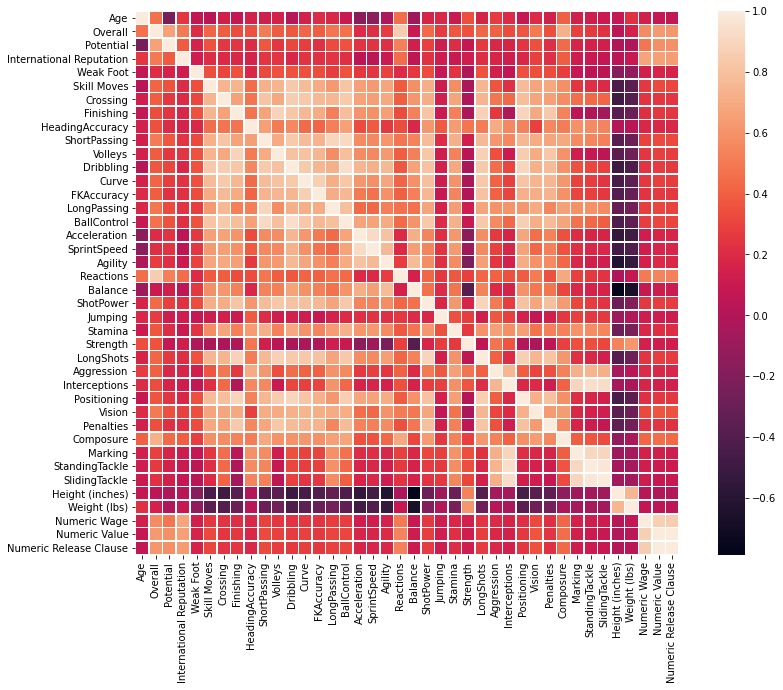

In [ ]:
fig = plt.subplots(figsize=(14,10))
sn.heatmap(corr_matrix, linewidths=.5, square=True)
plt.show()

Above is the heatmap of our correlation matrix

In [ ]:
cor_target = abs(corr_matrix["Numeric Wage"])
relevant_features = cor_target[cor_target>0.3]
relevant_features

Overall                     0.573896
Potential                   0.490633
International Reputation    0.677923
Reactions                   0.500088
Vision                      0.316461
Composure                   0.421709
Numeric Wage                1.000000
Numeric Value               0.861528
Numeric Release Clause      0.855922
Name: Numeric Wage, dtype: float64

From this we can see that the top features are Overall, Potential, Reactions, Vision and Composure which are the most highly correlated with our dependent variable - **Wage**. I will be using Overall as my independent variable for my regression models

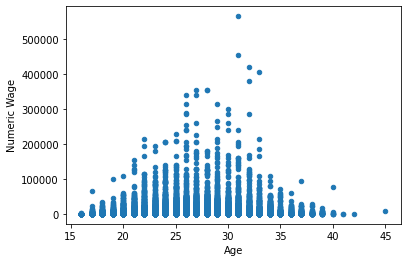

In [ ]:
FIFA_ds.plot.scatter(x ='Age', y ='Numeric Wage')

With this, we can see that players between the age of 26 to 33 have the highest wages

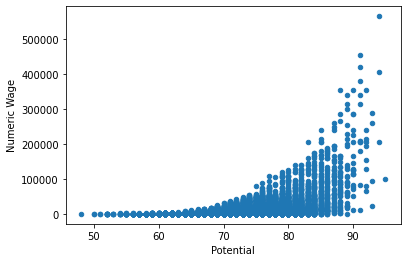

In [ ]:
FIFA_ds.plot.scatter(x ='Potential', y ='Numeric Wage')

With the above graph, we can see that Potential and Wage have an exponential relationship

###d) Processing of each dataset


#### Simple Linear Regression

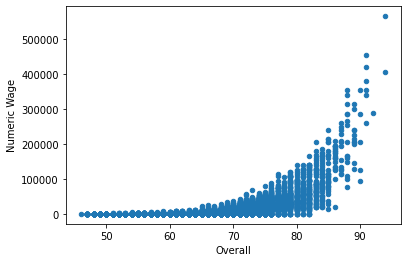

In [ ]:
FIFA_ds.plot.scatter(x ='Overall', y ='Numeric Wage')

Similar to our above graph, even Overall and Wage have a exponential relationship.

In [ ]:
X = FIFA_ds['Overall']
y = FIFA_ds['Numeric Wage']

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)

In [ ]:
x_test=np.array(x_test)
x_test=x_test.reshape(-1,1)

In [ ]:
linear_regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = linear_regressor.predict(x_test)
y_pred

array([[ 2023.76189873],
       [ 9316.27509387],
       [ 5670.0184963 ],
       ...,
       [ 2023.76189873],
       [23901.30148415],
       [-8915.00789398]])

Above are the predictions that our model makes based on our test set

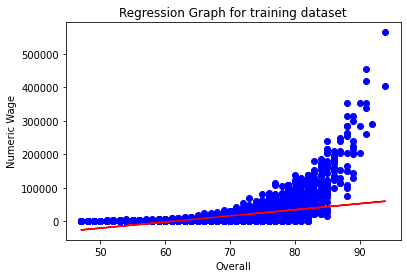

In [ ]:
plt.scatter(x_train,y_train,color="blue")
plt.xlabel("Overall")
plt.ylabel("Numeric Wage")
plt.title("Regression Graph for training dataset")
plt.plot(x_train, linear_regressor.predict(x_train),color="red")
plt.show()

Above is the graph for predictions based on the training dataset

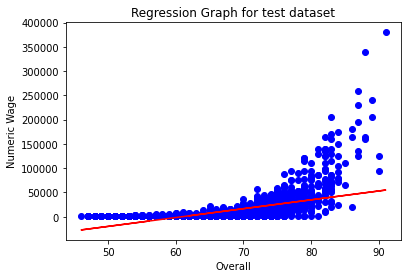

In [ ]:
plt.scatter(x_test,y_test,color="blue")
plt.xlabel("Overall")
plt.ylabel("Numeric Wage")
plt.title("Regression Graph for test dataset")
plt.plot(x_test, linear_regressor.predict(x_test),color="red")
plt.show()

Above is the graph for predictions based on the test dataset

In [ ]:
linear_regressor.intercept_

array([-111010.19262593])

In [ ]:
linear_regressor.coef_

array([[1823.12829878]])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

313714079.45084023

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3420057988074755

Our Simple Linear Model has a very high mean squared error and a low R^2 score of 0.342. This makes sense since we are using a linear model with just one independent variable to predict the dependent variable.

#### Multiple Linear Regression

In [ ]:
X1 = FIFA_ds.iloc[:,:-3]
y1 = FIFA_ds.iloc[:,-3]

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2,random_state=0)

In [ ]:
linear_regressor1 = LinearRegression()

In [ ]:
linear_regressor1.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred1 = linear_regressor1.predict(x_test1)
y_pred1


array([ 4153.2689615 , 10160.21807957, -3080.54465075, ...,
        1019.50600898, 15552.1766111 , -5765.76061897])

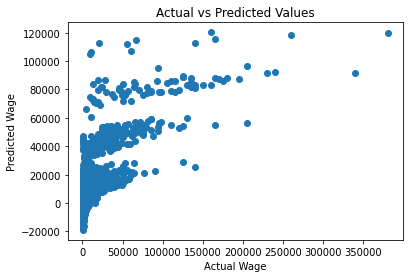

In [ ]:
plt.scatter(y_test1,y_pred1)
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.title("Actual vs Predicted Values")
plt.show()

Above is the graph for our predicted value vs actual value for wage

In [ ]:
linear_regressor1.intercept_

-96133.88544414754

In [ ]:
linear_regressor1.coef_

array([-8.44416603e+02,  1.28834621e+03, -1.15195356e+02,  2.97816343e+04,
        1.23973204e+01, -4.91470868e+02, -4.26104824e+00,  4.49678530e+01,
        2.00135305e+01, -6.23233340e+00, -2.02217302e+00, -1.99593394e+01,
       -1.28834528e+01,  1.71805113e+00, -2.12538463e+01,  6.68860873e+00,
       -1.75874826e+01,  9.19884077e+00, -2.44579920e+01,  8.08504653e+01,
        5.50301744e+01, -3.97396031e+01, -2.32750345e+01,  2.47065251e+01,
       -4.33871073e+01, -5.84133177e+00, -1.63968070e+01, -2.56170800e+01,
        3.44628953e+01,  1.96515007e+01, -1.10499907e+01, -1.61732401e+01,
       -1.42905011e+01,  3.29541448e+01,  2.69551888e+01,  1.95008544e+02,
        9.13243209e+00])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1, y_pred1)

214563025.6555631

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1, y_pred1)

0.5499684715495633

Our Multiple Linear Model with a R^2 score of 0.55 performs much better than our Simple Linear Model and also has a lower mean squared error. This makes sense since this model has more independent variables and is trained on a diverse dataset 

#### Polynomial Regression

In [ ]:
X2 = FIFA_ds['Overall']
y2 = FIFA_ds['Numeric Wage']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)

In [ ]:
X2=np.array(X2)

In [ ]:
X2=X2.reshape(-1,1)

In [ ]:
x_poly=poly_reg.fit_transform(X2)
x_poly

array([[1.0000000e+00, 9.4000000e+01, 8.8360000e+03, 8.3058400e+05,
        7.8074896e+07],
       [1.0000000e+00, 9.4000000e+01, 8.8360000e+03, 8.3058400e+05,
        7.8074896e+07],
       [1.0000000e+00, 9.2000000e+01, 8.4640000e+03, 7.7868800e+05,
        7.1639296e+07],
       ...,
       [1.0000000e+00, 4.7000000e+01, 2.2090000e+03, 1.0382300e+05,
        4.8796810e+06],
       [1.0000000e+00, 4.7000000e+01, 2.2090000e+03, 1.0382300e+05,
        4.8796810e+06],
       [1.0000000e+00, 4.6000000e+01, 2.1160000e+03, 9.7336000e+04,
        4.4774560e+06]])

In [ ]:
x_poly_train,x_poly_test,y_train2,y_test2=train_test_split(x_poly,y2,test_size=0.2, random_state=0)

In [ ]:
linear_regressor2 = LinearRegression()

In [ ]:
linear_regressor2.fit(x_poly_train,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred2=linear_regressor2.predict(x_poly_test)

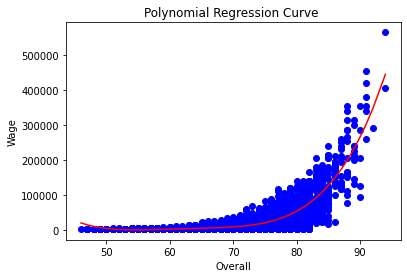

In [ ]:
plt.scatter(X2,y2,color='blue')
plt.xlabel("Overall")
plt.ylabel("Wage")
plt.title("Polynomial Regression Curve ")
plt.plot(X2,linear_regressor2.predict(poly_reg.fit_transform(X2)),color='red')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2, y_pred2)

127365756.64109135

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.7328588839651713

Our Polynomial Regression Model has the lowest mean sqaured error and also the highest R^2 score of 0.732. This makes sense since our independent and dependent varible have an exponential relationship

### e) Comparative Analysis

With our 3 regression models, we get the R^2 score:

Simple Linear Regression = ***0.342***

Multiple Linear Regression = ***0.559***

Polynomial Regression = ***0.732***


**With this, we can conclude that the Polynomial Regression Model was the most accurate for this dataset. Since our dependent and independent variables showed an exponential relationship, it makes sense that a Polynomial Model would come closest to being the best fit one as compared to the other Simple and Multiple Linear Models.**

### f) Ethical Issues

There are not many ethical issues with this dataset as FIFA informs these real life players of their ratings prior to releasing the game

### g) Bibliography

1.) https://towardsdatascience.com/fifa-20-player-clustering-f500cf0792c5

Title - Machine Learning on FIFA 20

Author - Erick Daniel Rodriguez V.

Publication Date - Spetember 2019

Publication - Towards Data Science



2.) https://towardsdatascience.com/how-to-predict-your-best-footballers-fifa-20-ratings-9d1147ced401

Title - How to predict your best footballers’ FIFA 20 ratings.

Author - Mubarak Ganiyu

Publication Date - October 2019

Publication - Towards Data Science



3.) https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

